<a href="https://colab.research.google.com/github/Adarshraj06/Customer-Segmentation-RFM-KMeans/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#load dataset Online Retail.xlsx and read first five columns

df = pd.read_excel("Online Retail.xlsx")
df.head()
# Select the first five columns
# df_first_five_cols = df.iloc[:, :5]

# Print the first few rows of the selected columns
# print(df_first_five_cols.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
# last few rows
df.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
# Dataset Overview
print("Shape of the dataset:", df.shape)

print("\nColumns:\n", df.columns.tolist())

print("\nMetadata Info:",end=" ")
print(df.info())

print("\nSummary Statistics:")
df.describe(include='all')

Shape of the dataset: (541909, 8)

Columns:
 ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Metadata Info: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

Summary Statistics:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,NaN,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,NaN,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,NaN,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,NaN
min,NaN,NaN,NaN,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,NaN
max,NaN,NaN,NaN,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,NaN


In [ ]:
# missing values and unique values

print("\nMissing Values:")
print(df.isnull().sum())

print("\nUnique Values:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} unique values")


Missing Values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Unique Values:
- InvoiceNo: 25900 unique values
- StockCode: 4070 unique values
- Description: 4223 unique values
- Quantity: 722 unique values
- InvoiceDate: 23260 unique values
- UnitPrice: 1630 unique values
- CustomerID: 4372 unique values
- Country: 38 unique values


In [ ]:
# Drop Rows with Missing Customer IDs

# Drop rows where 'CustomerID' is missing
df_cleaned = df.dropna(subset=['CustomerID'])

# Verify the changes
print("\nShape after dropping rows with missing CustomerID:", df_cleaned.shape)
print("\nMissing Values after dropping rows with missing CustomerID:")
print(df_cleaned.isnull().sum())


Shape after dropping rows with missing CustomerID: (406829, 8)

Missing Values after dropping rows with missing CustomerID:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [ ]:
# Remove Canceled Orders

# Check the number of unique values in 'InvoiceNo' and 'StockCode' before removing canceled orders
print(f"Unique InvoiceNo values before removing canceled orders: {df_cleaned['InvoiceNo'].nunique()}")
print(f"Unique StockCode values before removing canceled orders: {df_cleaned['StockCode'].nunique()}")


# Remove rows where 'InvoiceNo' starts with 'C' (canceled orders)
df_cleaned = df_cleaned[~df_cleaned['InvoiceNo'].astype(str).str.startswith('C')] # it will keep only those rows which doesn't contain c

# Verify the changes
print("\nShape after removing canceled orders:", df_cleaned.shape)

# Check the number of unique values in 'InvoiceNo' and 'StockCode' after removing canceled orders
print(f"\nUnique InvoiceNo values after removing canceled orders: {df_cleaned['InvoiceNo'].nunique()}")
print(f"Unique StockCode values after removing canceled orders: {df_cleaned['StockCode'].nunique()}")

# Display the first few rows of the cleaned dataframe to confirm
print("\nRows of the dataframe after removing canceled orders:")
print(df_cleaned.head(243)) # row 237-243 was containing cancled orders

Unique InvoiceNo values before removing canceled orders: 22190
Unique StockCode values before removing canceled orders: 3684

Shape after removing canceled orders: (397924, 8)

Unique InvoiceNo values after removing canceled orders: 18536
Unique StockCode values after removing canceled orders: 3665

Rows of the dataframe after removing canceled orders:
    InvoiceNo StockCode                          Description  Quantity  \
0      536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1      536365     71053                  WHITE METAL LANTERN         6   
2      536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3      536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4      536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
..        ...       ...                                  ...       ...   
247    536392     22127        PARTY CONES CARNIVAL ASSORTED        12   
248    536392     22128           PARTY CONES CANDY A

In [ ]:
# Remove Rows with Negative or Zero UnitPrice

# Filter out rows where 'UnitPrice' is less than or equal to 0
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]

# Verify the changes
print("\nShape after removing rows with non-positive UnitPrice:", df_cleaned.shape)

# Check the minimum value of UnitPrice to confirm removal
print(f"\nMinimum UnitPrice after removal: {df_cleaned['UnitPrice'].min()}")


Shape after removing rows with non-positive UnitPrice: (397884, 8)

Minimum UnitPrice after removal: 0.001


In [ ]:
# check if there is any row contains 0 or less than 0 value
df_cleaned[df_cleaned['Quantity'] <= 0]
df_cleaned[df_cleaned['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
# Create a 'TotalPrice' Column

df_cleaned['TotalPrice'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

In [ ]:
print(df_cleaned.shape) # column changes from 8 to 9
df_cleaned.head() # TotalPrice column is visible

(397884, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
import datetime

# Set reference date to one day after the last invoice date
today_date = df_cleaned['InvoiceDate'].max() + datetime.timedelta(days=1)

In [ ]:
# Group by Customer and Calculate RFM
rfm = df_cleaned.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                # Frequency
    'TotalPrice': 'sum'                                    # Monetary
})

In [ ]:
# Rename the Columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [ ]:
# View Your Final RFM Table
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


In [ ]:
rfm.shape

(4338, 3)

In [ ]:
# We sliced the customers into 5 equal groups for each metric
# Then gave them a score label (1 = worst, 5 = best)
# These scores were stored in new columns: R_Score, F_Score, and M_Score
# Recency Score
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [ ]:
# Frequency Score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

In [ ]:
# Monetary Score
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [ ]:
# RFM_Segment gives a customer’s profile, like '545' (high R, mid F, high M)
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)
# RFM_Score gives a total score out of 15 — easy to rank customers

In [ ]:
rfm.head(50000)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7
12347.0,2,7,4310.00,5,5,5,555,15
12348.0,75,4,1797.24,2,4,4,244,10
12349.0,19,1,1757.55,4,1,4,414,9
12350.0,310,1,334.40,1,1,2,112,4
...,...,...,...,...,...,...,...,...
18280.0,278,1,180.60,1,2,1,121,4
18281.0,181,1,80.82,1,2,1,121,4
18282.0,8,2,178.05,5,3,1,531,9


In [ ]:
# Prepare the Data for Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Use only the score columns
rfm_clustering = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int)

# Optional: Standardize the scores (recommended)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_clustering)


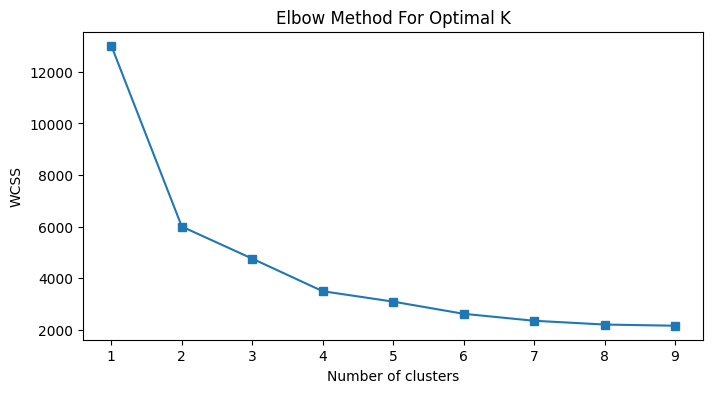

In [ ]:
# Choose the Right Number of Clusters (K)
# WCSS = Within-Cluster Sum of Squares
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), wcss, marker='s')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
# prompt: Train KMeans and Assign Clusters

# Apply K-Means Clustering
# Based on the elbow curve, let's choose a reasonable number of clusters, e.g., 3, 4 or 5.
# For this example, let's choose 4 clusters.
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
kmeans.fit(rfm_scaled)

# Assign Cluster Labels to the RFM DataFrame
rfm['Cluster'] = kmeans.labels_

# View the RFM data with cluster assignments
print("\nRFM DataFrame with Cluster Assignments:")
rfm.head()


RFM DataFrame with Cluster Assignments:


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Cluster
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,1
12347.0,2,7,4310.00,5,5,5,555,15,3
12348.0,75,4,1797.24,2,4,4,244,10,1
12349.0,19,1,1757.55,4,1,4,414,9,2
12350.0,310,1,334.40,1,1,2,112,4,0


In [ ]:
rfm['Cluster'].value_counts().sort_index()

,count
Cluster,
0,1181
1,876
2,972
3,1309


In [ ]:
rfm.dtypes


,0
Recency,int64
Frequency,int64
Monetary,float64
R_Score,category
F_Score,category
M_Score,category
RFM_Segment,object
RFM_Score,int64
Cluster,int32


In [ ]:
# Convert R, F, M Scores to int for aggregation
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)


In [ ]:
# Group by cluster and calculate averages
rfm_summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean'
}).round(2)

# Add customer count per cluster (aligned safely)
rfm_summary['Count'] = rfm.groupby('Cluster').size()

# View the result
rfm_summary


,R_Score,F_Score,M_Score,Recency,Frequency,Monetary,Count
Cluster,,,,,,,
0,1.39,1.67,1.74,214.83,1.24,328.64,1181
1,2.24,3.52,3.71,108.29,3.49,1622.41,876
2,3.81,2.07,1.97,31.93,1.58,407.51,972
3,4.41,4.54,4.43,16.66,9.53,5122.96,1309


In [ ]:
rfm_summary.sort_values(by=['Recency', 'Frequency', 'Monetary'], ascending=[True, False, False])

,R_Score,F_Score,M_Score,Recency,Frequency,Monetary,Count
Cluster,,,,,,,
3,4.41,4.54,4.43,16.66,9.53,5122.96,1309
2,3.81,2.07,1.97,31.93,1.58,407.51,972
1,2.24,3.52,3.71,108.29,3.49,1622.41,876
0,1.39,1.67,1.74,214.83,1.24,328.64,1181


In [ ]:
segment_map = {
    3: 'VIP Customers',
    2: 'Potential Loyalists',
    1: 'At Risk Loyalists',
    0: 'Lost Customers'
}
rfm['Segment'] = rfm['Cluster'].map(segment_map)
rfm[['Cluster', 'Segment',"R_Score",	"F_Score",	"M_Score",	"Recency",	"Frequency",	"Monetary"]].head()

,Cluster,Segment,R_Score,F_Score,M_Score,Recency,Frequency,Monetary
CustomerID,,,,,,,,
12346.0,1,At Risk Loyalists,1,1,5,326,1,77183.60
12347.0,3,VIP Customers,5,5,5,2,7,4310.00
12348.0,1,At Risk Loyalists,2,4,4,75,4,1797.24
12349.0,2,Potential Loyalists,4,1,4,19,1,1757.55
12350.0,0,Lost Customers,1,1,2,310,1,334.40


<ipython-input-135-2171541553>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')


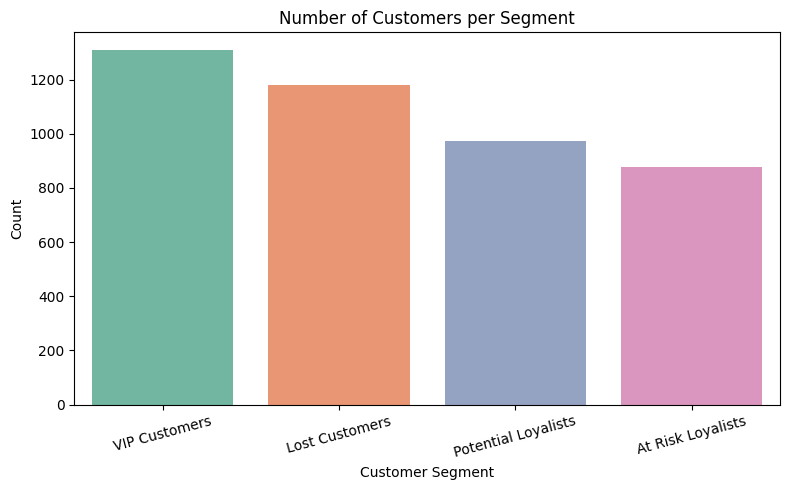

In [ ]:
# Bar Chart – Number of Customers per Segment
plt.figure(figsize=(8, 5))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')

plt.title('Number of Customers per Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


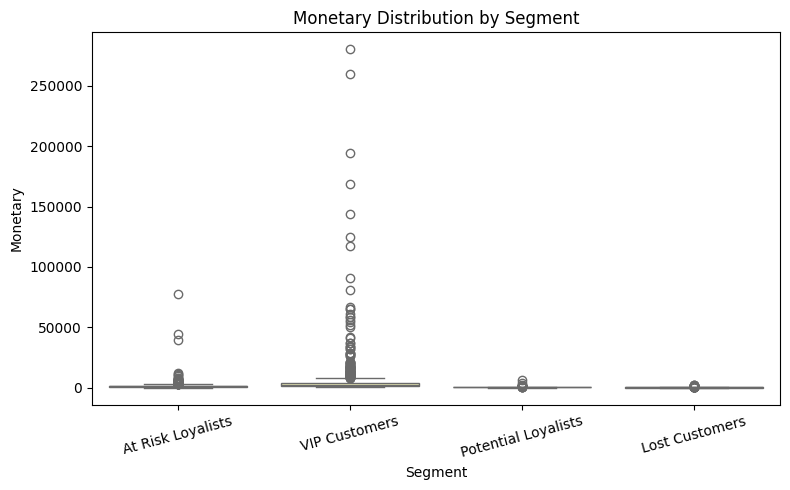

In [ ]:
# Boxplots – Monetary / Frequency / Recency per Segment
# Monetary by Segment:
plt.figure(figsize=(8, 5))
sns.boxplot(data=rfm, x='Segment', y='Monetary', hue='Segment', palette='Set3', legend=False)
plt.title('Monetary Distribution by Segment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<ipython-input-137-3220234541>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Segment', y='Frequency', palette='Set3')


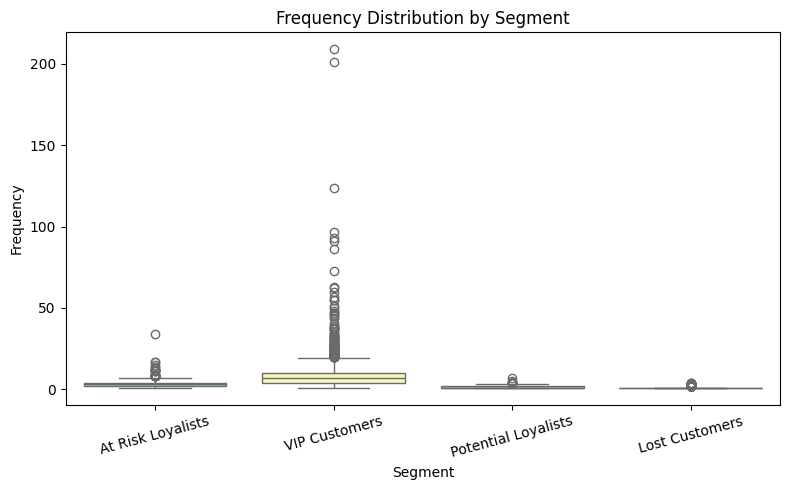

In [ ]:
# Frequency by Segment:
plt.figure(figsize=(8, 5))
sns.boxplot(data=rfm, x='Segment', y='Frequency', palette='Set3')
plt.title('Frequency Distribution by Segment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


<ipython-input-138-1132379878>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=rfm, x='Segment', y='Recency', palette='Set3')


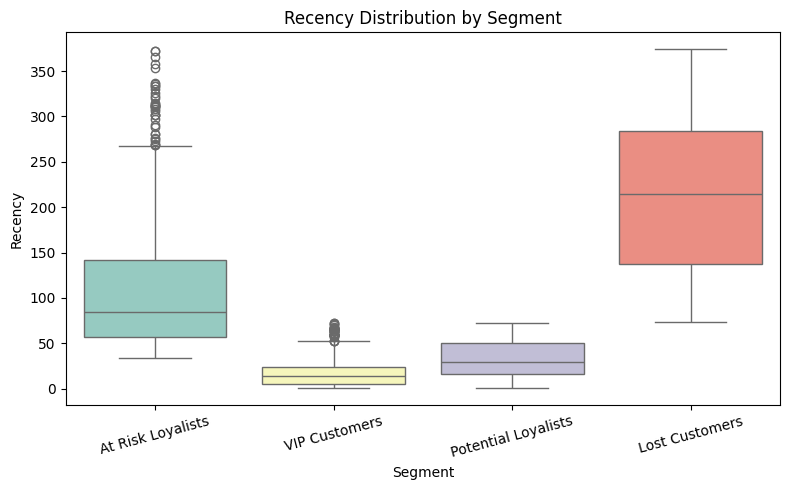

In [ ]:
# Recency by Segment:
plt.figure(figsize=(8, 5))
sns.boxplot(data=rfm, x='Segment', y='Recency', palette='Set3')
plt.title('Recency Distribution by Segment')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


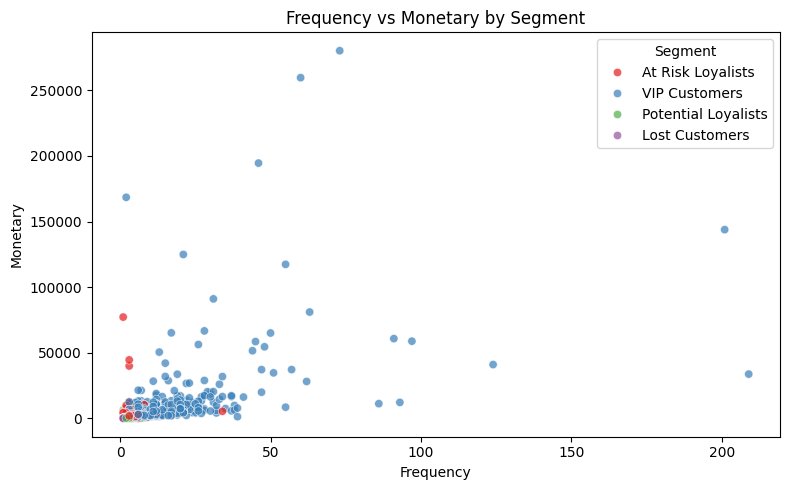

In [ ]:
# Scatter Plot – Frequency vs Monetary
plt.figure(figsize=(8, 5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set1', alpha=0.7)
plt.title('Frequency vs Monetary by Segment')
plt.tight_layout()
plt.show()


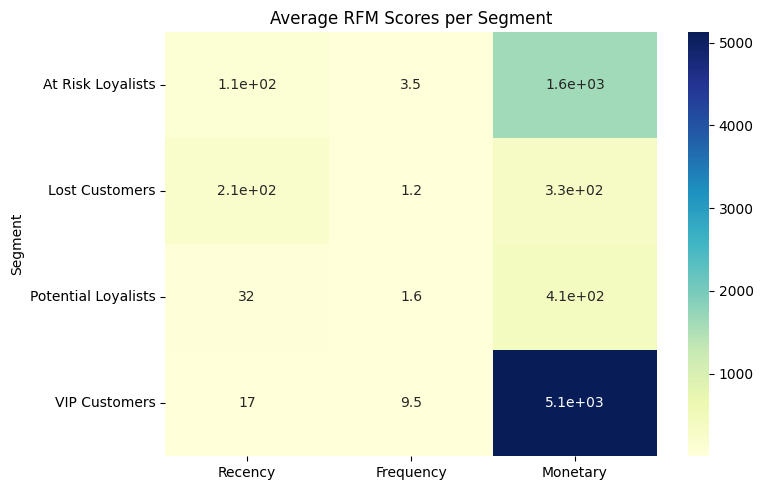

In [ ]:
# Heatmap
rfm_grouped = rfm.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().round(1)

plt.figure(figsize=(8, 5))
sns.heatmap(rfm_grouped, annot=True, cmap='YlGnBu')
plt.title('Average RFM Scores per Segment')
plt.tight_layout()
plt.show()


In [ ]:
print(rfm.columns)

Index(['Recency', 'Frequency', 'Monetary', 'R_Score', 'F_Score', 'M_Score',
       'RFM_Segment', 'RFM_Score', 'Cluster', 'Segment'],
      dtype='object')


In [ ]:
# previously CustomerID was working as index not as a column so this reset index will make it as a proper column
rfm = rfm.reset_index()

In [ ]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Score,Cluster,Segment
0,12346.0,326,1,77183.60,1,1,5,115,7,1,At Risk Loyalists
1,12347.0,2,7,4310.00,5,5,5,555,15,3,VIP Customers
2,12348.0,75,4,1797.24,2,4,4,244,10,1,At Risk Loyalists
3,12349.0,19,1,1757.55,4,1,4,414,9,2,Potential Loyalists
4,12350.0,310,1,334.40,1,1,2,112,4,0,Lost Customers


In [ ]:
# Save the Segmented Data
rfm.to_csv("rfm_customer_segments.csv", index=False)